In [36]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d



plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,array,arange,linspace,meshgrid

from scipy.integrate import quad,dblquad

from matplotlib import cm

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

A spherical shell 2 cm in radius has density the square of the distance to the top pole (in g/cm$^2$). Write down an integral to compute its total mass. 

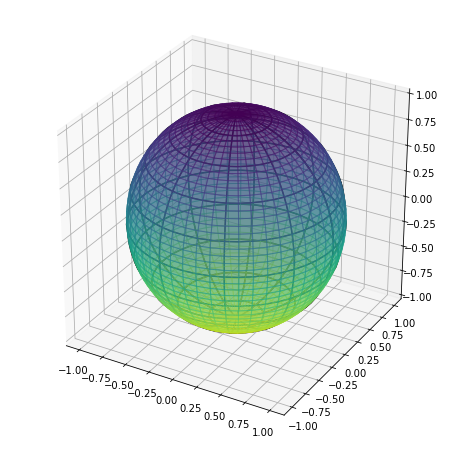

In [2]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
u = np.linspace(0,pi,50)
v = np.linspace(0,2*pi,50)
U,V = np.meshgrid(u,v)
mc = cm.viridis((2-2*cos(U))/4)
ax.plot_surface(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=.5,cmap='viridis',facecolors=mc)
ax.plot_wireframe(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=1,color='k',rcount=10,ccount=10);


#### Answer

We put the coordinate axes at the center. The density is thus $\rho(x,y,z) = x^2 + y^2 +(2-z)^2$. 

Parametrize the sphere as $$\vec r(u,v) = \begin{bmatrix} 2\sin u \cos v \\ 2 \sin u \sin v \\ 2 \cos u \\ \end{bmatrix}$$ for $0 \leq u \leq \pi, 0 \leq v \leq 2\pi$, which gives the familiar

$$|\vec r_u\times \vec r_v| = 4\sin u.$$

We compute

$$\text{mass} = \iint_\Omega \rho\, dS = \int_0^\pi \int_0^{2\pi} (5-4\cos u)4\sin u \,dv\,du = 80\pi$$ 


# Lecture 24

## Flux Integrals and the Divergence Theorem

  - Objectives
    - Compute surface integrals
      - of a vector field (flux integrals)
    - Divergence Theorem
      - know what divergence measures
      - describe it as a conservation law
      - use it to compute flux

# Lecture 24

  - Objectives
    - Compute surface integrals
      - of a vector field (flux integrals)
    - Divergence Theorem
      - know what divergence measures
      - describe it as a conservation law
      - use it to compute flux
  - Resources
    - Content
      - Stewart: §16.6-9
      - New Strang:  
        - [§6.5](https://openstax.org/books/calculus-volume-3/pages/6-5-divergence-and-curl) [§6.6](https://openstax.org/books/calculus-volume-3/pages/6-6-surface-integrals) [§6.8](https://openstax.org/books/calculus-volume-3/pages/6-8-the-divergence-theorem)
      - [Slides](https://hub.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-f19&urlpath=tree%2Fmvc-f19%2Fslides%2Fmvc-L23.ipynb) via JupyterHub
      - [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)
      - Mooculus: [Surface Integrals](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInSurfaceIntegrals) [Divergence Theorem](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInDivergenceTheorem)
    - Extras 
      - CalcBLUE: [2-Form Fields](https://www.youtube.com/watch?v=LNaAEy_K-Cg&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=64) *Use with caution. This is a different and more general formulation of surface integrals. 

# Orientation

A surface $\Omega$ is **oriented** if there is a continuous choice of unit normal vector $\vec N$ at each point of the surface.

That is, there is a chosen "direction" through the surface. 

Practically speaking, we arrange the parametrization $\vec r(u,v)$ such that $\vec r_u\times \vec r_v$ points in the direction of $\vec N$. 

### Common examples

  - Orient the graph of a function "upward".
   
$$\vec r(u,v) = u \,\vec i + v \,\vec j + (1-u^2) \,\vec k $$ 

for $-1\leq u,v \leq 1$.
  

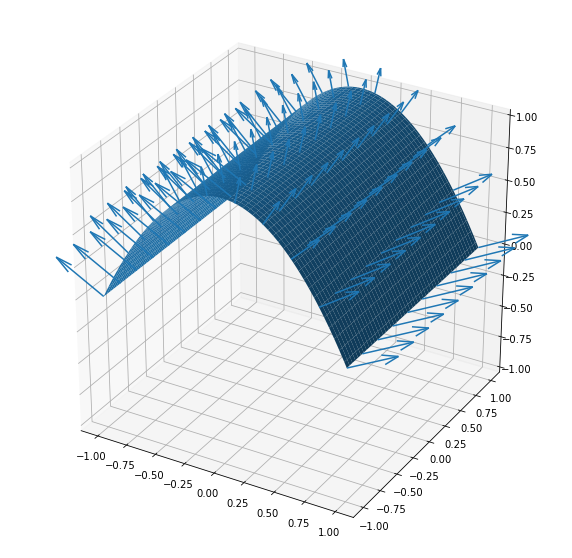

In [3]:
u = v = np.linspace(-1,1,100)
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
U,V = np.meshgrid(u,v)
ax.plot_surface(U,V,1-U**2)
u = v = np.linspace(-1,1,10)
U,V = np.meshgrid(u,v)
ax.set_zlim((-1,1))
ax.quiver(U,V,1-U**2,2*U,0,1,length=.2);

### Common examples

  - Orient a surface of revolution "outward".
   
$$\vec r(u,v) = (1+u)\cos v \,\vec i + u \,\vec j + (1+u)\sin v \,\vec k $$ 

for $-1\leq u \leq 1, 0 \leq v \leq 2\pi$.
  

In [4]:
@interact
def _(angle=(-96,96,6)):
    u = np.linspace(-1,1,100)
    v = np.linspace(0,2*pi,100) 
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.view_init(30,angle)
    U,V = np.meshgrid(u,v)
    ax.plot_surface((1+U)/2*cos(V),U,(1+U)/2*sin(V),alpha=.6)
    u = np.linspace(-1,1,10)
    v = np.linspace(0,2*pi,10) 
    U,V = np.meshgrid(u,v)
    ax.set_zlim((-1,1))
    ax.quiver((1+U)/2*cos(V),U,(1+U)*sin(V)/2,(1+U)/2*cos(V),-1/2-U/2,(1+U)/2*sin(V),length=.2,color='k');

interactive(children=(IntSlider(value=0, description='angle', max=96, min=-96, step=6), Output()), _dom_classe…

### Nonorientable

  - Some strange surfaces, like the _Möbius strip_, cannot be oriented
   
$$\vec r(u,v) = (\cos v + u/3 \cos(v/2)\cos(v)) \,\vec i + (\sin v + u/3\cos(v/2)\sin(v) \,\vec j + u/3\sin(v/2) \,\vec k $$ 

for $-1\leq u \leq 1, 0 \leq v \leq 2\pi$.
  

In [59]:
@interact
def _(angle=(-96,96,6),t=(0,2*pi)):
    u = np.linspace(-1,1,5)
    v = np.linspace(0,2*pi,50) 
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.view_init(30,angle)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(1*cos(V)+U/3*cos(V/2)*cos(V),1*sin(V) + U/3*cos(V/2)*sin(V), U/3*sin(V/2),alpha=.6)
    u = np.linspace(-1,1,10)
#     v = np.linspace(0,2*pi,10) 
#     U,V = np.meshgrid(u,v)
    ax.set_zlim((-4/3,4/3))
    ax.quiver(1*cos(t)+U/3*cos(t/2)*cos(t),1*sin(t) + U/3*cos(t/2)*sin(t), U/3*sin(t/2), 
              U*sin(t)/18 - U*sin(2*t)/36 + sin(t/2)/6 - sin(3*t/2)/6,
              U*sin(t/2)**2*cos(t)/18 - U*sin(t)**2/12 - U*cos(t)/12 + U/36 - cos(t/2)/6 + cos(3*t/2)/6,
              (U*cos(t/2) + 3)*cos(t/2)/9,length=.5,color='k');

interactive(children=(IntSlider(value=0, description='angle', max=96, min=-96, step=6), FloatSlider(value=3.14…

# Flux Integrals

A **flux integral** of a vector field $\vec F$ through a surface $\Omega$ (somethimes just the "surface integral of a vector field") with orientation $\vec N$ corresponding to parametrization $\vec r:\mathcal D \to \RR^3$ is 

$$\iint_\Omega \vec F\cdot d\vec S = \iint_\Omega \vec F \cdot \vec N\,dS$$

  - Where? on a 2D surface $\Omega$ in $\RR^3$.

  - What? a vector field $\vec F$.

  - How? In the (positive) direction perpendicular to the surface.

$$= \iint_D \vec F(\vec r(u,v))\cdot \frac{r_u\times \vec r_v}{|\vec r_u \times \vec r_v|} |\vec r_u \times \vec r_v|\,dA $$

$$= \iint_D \vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v\,dA $$

That integrand $\vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v$ is a triple-product, or, rather, a volume of a parallelopiped, two sides defined by the surface, and one by the vector field.  

In [7]:
@interact
def _(angle=(-96,6,6),vangle=(0,90,6),
     F=fixed(lambda x,y,z: 1/3*np.array([1+x,1+y,1])),
     r=fixed(lambda u,v: np.array([u,v+u/4,1/2-u**2/10-v**2/10])),
     ru=fixed(lambda u,v: np.array([1,1/4,-u*2/10])),
     rv=fixed(lambda u,v: np.array([0,1,-v*2/10])),
     level=(1,4,1)):
    u = v = np.linspace(0,1,100)
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    U,V = np.meshgrid(u,v)
    ax.plot_surface(*r(U,V),alpha=.6)
    U,V = np.meshgrid([0,1],[0,1])
    for pt in [(i,j) for i in np.arange(0,1,1/level) for j in np.arange(0,1,1/level)]:
        x = r(*pt)
        a = ru(*pt)
        b = rv(*pt)
        c = 0*np.cross(a,b)
        ax.plot_surface((r(*pt)[0] + U/level*(ru(*pt)[0]) + V/level*(rv(*pt)[0])),
                        (r(*pt)[1] + U/level*(ru(*pt)[1]) + V/level*(rv(*pt)[1])),
                        (r(*pt)[2] + U/level*(ru(*pt)[2]) + V/level*(rv(*pt)[2])),alpha=.6,color='r')
        ax.quiver(r(*pt)[0]*np.ones(3),r(*pt)[1]*np.ones(3),r(*pt)[2]*np.ones(3),
                  [a[0],b[0],c[0]],[a[1],b[1],c[1]],[a[2],b[2],c[2]],length=1/level,color='k');
        ax.quiver(r(*pt)[0],r(*pt)[1],r(*pt)[2],
                  F(*r(*pt))[0],F(*r(*pt))[1],F(*r(*pt))[2],length=1,color='b');
    x = r(0,0)
    a = ru(0,0)
    b = rv(0,0)
    c = F(*r(0,0))
    for v1,v2 in [[(x+(a+b)/level),(x+(a+b)/level+c)],
             [(x+(a)/level),(x+(a)/level+c)],
             [(x+(b)/level),(x+(b)/level+c)],
             [(x+(a)/level+c),(x+(a+b)/level+c)],
             [(x+(b)/level+c),(x+(a+b)/level+c)],
             [(x+(a)/level+c),(x+c)],
             [(x+(b)/level+c),(x+c)]]:
        ax.plot([v1[0],v2[0]],
                [v1[1],v2[1]],
                [v1[2],v2[2]],'g--')
    for ch in "xyz": 
        getattr(ax,f"set_{ch}lim")((0,1))
#     ax.quiver(0,0,1/2,1,1,1,length=.5,color='b');
    ax.view_init(vangle,angle)
#     ax.set_title(F(*r(*pt))[0])
#     ax.plot([1/2,1/2])

interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), IntSlider(value=42, d…

### Example

Consider the constant vector field $\vec F(x,y,z) = \vec i$. Consider the surfaces

  - $\Omega_1$: piece of the plane $y=0$ for $0 \leq x,z \leq 1$
  - $\Omega_2$: piece of the plane $x= 0$ for $0 \leq y,z \leq 1$

oriented in the positive $x$-direction. Through which surface is the flux of $\vec F$ greater?

In [22]:
@interact
def _(angle = (-96,6,6),p=(0,1,.05)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,1,20)
    v = np.linspace(0,1,10)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(cos(p*pi/2)*U,sin(p*pi/2)*U,V,alpha=.5)
    ax.plot_wireframe(cos(p*pi/2)*U,sin(p*pi/2)*U,V,alpha=1,color='k',rcount=10,ccount=10)
    ax.view_init(30,angle)
    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);


interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), FloatSlider(value=0.0…

## Divergence

Divergence is a scalar measurement on a vector field $ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z)  \,\vec k$. 

$$ \operatorname{div} \vec F = \nabla \cdot \vec F = P_x +Q_y + R_z $$

It measures the degree to which a vector field is "expanding" or "spreading out". 

# Another Big Theorem

Recall the special form of Green's Theorem in 2D.

$$ \oint_{\partial D} \vec F \cdot d \vec n = \iint_D (P_x + Q_y)\,dA$$ for a smooth vector field $\vec F = P \,\vec i + Q\,\vec j$. Note, the integrand on the right is (2D) divergence $\nabla \cdot \vec F $. 

## The Divergence Theorem

Let $E$ be a solid region in $\RR^3$ and $\partial E$ its outward-oriented boundary. If $\vec F(x,y,z)$ is a smooth vector field, then

$$ \iint_{\partial E} \vec F \cdot d \vec S = \iiint_E \nabla \cdot \vec F\,dV$$

#### How to remember DT

  - Maxwell's equation
     $$\nabla\cdot \vec E = \rho$$
Charge density is the divergence of the electric field. 


![Screengrab for Electric Field Hockey](efh.png)

Courtesy: [Electric Field Hockey](https://phet.colorado.edu/en/simulation/electric-hockey)

  - Champagne
![Mets' Terry CVollins spraying champagne in 2015](https://1.bp.blogspot.com/-UEzDm6Zzhco/ViioEBfuJVI/AAAAAAAAfak/Wv_PQY8hs-w/s1600/-fa3579127e7e3ceb.JPG)

Terry Collins knows the Divergence Theorem. Photo credit: [John Munson | NJ Advance Media for NJ.com](https://www.nj.com/mets/2015/10/look_inside_mets_clubhouse_as_they_celebrate_world.html)

## Justification

Start by considering the flux through the boundary of a solid region. Then consider chopping the region into tiny rectangular boxes and consider that the net flux is the sum of the flux out each little box as shared sides between adjacent boxes get cancelled out.
  
  

In [53]:
@interact(zoom=(0,1,.025))
def _(zoom=1):

    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,pi,150)
    v = np.linspace(0,2*pi,100)
    U,V = np.meshgrid(u,v)
    rd = 1+1/3*sin(U*2)**2*sin(V*3)**2
    srf = rd*sin(U)*cos(V),rd*sin(U)*sin(V),rd*cos(U)
    ax.plot_surface(*srf,alpha=.5*zoom)
    ax.plot_wireframe(*srf,alpha=zoom,color='k',rcount=10,ccount=10)
    u = v = np.linspace(-1,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,(V),W,U,V,W,length=.2,alpha=zoom);
    U,V = meshgrid([0,1],[0,1])
    srf = .05*U,0,.05*V
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)
    srf = .05,.05*U,.05*V
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)
    srf = .05*U,.05*V,.05 + U*0
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)
    srf = .05*U,.05,.05*V
    ax.plot_surface(*srf,alpha=.7*(1-zoom),color='b')
    ax.plot_wireframe(*srf,alpha=.7*(1-zoom),color='k',rcount=10,ccount=10)

    U,V,W = np.meshgrid([0.,1.,2.],[0.,1.,2.],[0.,1.,2.])

    ax.quiver(.025*U,(.025*V),.025*W,.025*U,.025*V,.025*W,length=.2,alpha=(1 - zoom));

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-zoom,.1+.9*zoom])


interactive(children=(FloatSlider(value=1.0, description='zoom', max=1.0, step=0.025), Output()), _dom_classes…

$$\iint_{\partial E} \vec F\cdot \vec N\,dS \approx \sum\Delta \text{flux} $$

$$ \Delta\text{flux}_{x\text{-dir}} = \left(P\left(x + \frac{\Delta x}{2}, y, z\right) - P\left(x - \frac{\Delta x}{2}, y, z\right)\right) \Delta y\,\Delta z$$

$$\approx P_x(x,y,z)\, \Delta x\,\Delta y\,\Delta z$$

Similarly, 

$$ \Delta\text{flux}_{y\text{-dir}} \approx Q_y(x,y,z)\, \Delta x\,\Delta y\,\Delta z$$

$$ \Delta\text{flux}_{z\text{-dir}} \approx R_z(x,y,z)\, \Delta x\,\Delta y\,\Delta z$$

Add these together, to get

$$\sum\Delta \text{flux} = \sum (P_x + Q_y + R_z) \, \Delta x\,\Delta y\,\Delta z$$

$$ \longrightarrow \iiint_E \operatorname{div} \vec F dV $$

## The Divergence Theorem

Let $E$ be a solid region in $\RR^3$ and $\partial E$ its outward-oriented boundary. If $\vec F(x,y,z)$ is a smooth vector field, then

$$ \iint_{\partial E} \vec F \cdot d \vec S = \iiint_E \nabla \cdot \vec F\,dV$$

### Revisit Cone

Find the flux of the vector field $z\,\vec k$ through the piece of the cone $z=\sqrt{x^2 + y^2}$ below $z=2$, oriented upward.
  
  

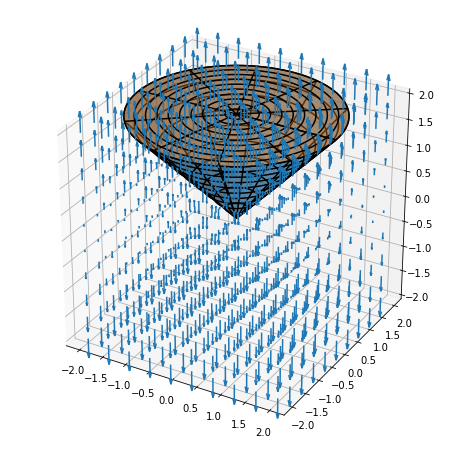

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
u = np.linspace(0,2,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
ax.plot_surface(U*cos(V),U*sin(V),U,alpha=.5)
ax.plot_wireframe(U*cos(V),U*sin(V),U,alpha=1,color='k',rcount=10,ccount=10)
ax.plot_surface(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=.5)
ax.plot_wireframe(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=1,color='k',rcount=10,ccount=10)
u = v = np.linspace(-2,2,10)
# v = np.linspace(0,2*pi,10)
U,V,W = np.meshgrid(u,v,u)
ax.quiver(U,(V),W,0*U,0*U,W,length=.2);


### Fishing in a river

How could we know the two surfaces in the earlier example had the same flux?

In [16]:
@interact
def _(angle = (-96,6,6),caps=False):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,1,20)
    v = np.linspace(0,1,10)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(0*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(0*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    ax.plot_surface(3*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(3*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    if caps:
        ax.plot_surface(3*V*U*(1-U),U,np.ones_like(V),alpha=.5)
        ax.plot_wireframe(3*V*U*(1-U),U,np.ones_like(V),alpha=1,color='k',rcount=10,ccount=10)
        ax.plot_surface(3*V*U*(1-U),U,np.zeros_like(V),alpha=.5)
        ax.plot_wireframe(3*V*U*(1-U),U,np.zeros_like(V),alpha=1,color='k',rcount=10,ccount=10)
    ax.view_init(30,angle)
    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);


interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), Checkbox(value=False,…

Let $\Omega_1$ and $\Omega_2$ be as before (with a negative sign indicating an opposite orientation) and $T_1$ and $T_0$ be the enclosing, upward-oriented "caps" to the solid at $z=1$ and $z=0$, respectively. 

$$ \iint_{\Omega_2} \vec F\cdot d\vec S + \iint_{-\Omega_1} \vec F\cdot d\vec S + \iint_{T_1} \vec F\cdot d\vec S + \iint_{-T_0} \vec F\cdot d\vec S = \iiint_E \nabla\cdot \vec F\,dV $$ 

$$ \iint_{\Omega_2} \vec F\cdot d\vec S - \iint_{\Omega_1} \vec F\cdot d\vec S = 0 $$ 

### Exercise

In the example immediately above, change the vector field to $x\,\vec i$ and use the Divergence Theorem to compute the flux through $\Omega_2$. 